<a href="https://colab.research.google.com/github/vahid-nejad/stock_price_predication_with_LSTM/blob/main/stock_price_predication_with_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam
%matplotlib inline

In [61]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/GOOG.csv", date_parser=True)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
3,2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276


In [62]:
data_train = data[data['Date']<'2021-01-01'].copy()
data_train

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
3,2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276
...,...,...,...,...,...,...,...
4117,2020-12-24,1735.000000,1746.000000,1729.109985,1738.849976,1738.849976,346800
4118,2020-12-28,1751.635010,1790.728027,1746.334961,1776.089966,1776.089966,1393000
4119,2020-12-29,1787.790039,1792.439941,1756.089966,1758.719971,1758.719971,1299400
4120,2020-12-30,1762.010010,1765.094971,1725.599976,1739.520020,1739.520020,1306100


In [63]:
data_test = data[data['Date'] >= '2021-01-01'].copy()
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
4122,2021-01-04,1757.540039,1760.650024,1707.849976,1728.239990,1728.239990,1901900
4123,2021-01-05,1725.000000,1747.670044,1718.015015,1740.920044,1740.920044,1145300
4124,2021-01-06,1702.630005,1748.000000,1699.000000,1735.290039,1735.290039,2602100
4125,2021-01-07,1740.060059,1788.400024,1737.050049,1787.250000,1787.250000,2265000
4126,2021-01-08,1787.979980,1809.839966,1773.535034,1807.209961,1807.209961,2050600
...,...,...,...,...,...,...,...
4204,2021-05-03,2402.719971,2419.699951,2384.500000,2395.169922,2395.169922,1689400
4205,2021-05-04,2369.739990,2379.260010,2311.699951,2354.250000,2354.250000,1756000
4206,2021-05-05,2368.419922,2382.199951,2351.409912,2356.739990,2356.739990,1090300
4207,2021-05-06,2350.639893,2382.709961,2342.337891,2381.350098,2381.350098,1030900


In [64]:

data_train = data_train.drop(['Date', 'Adj Close'], axis=1 )

In [65]:
scalar = MinMaxScaler()
scaled_training_data=scalar.fit_transform(data_train)
scaled_training_data

array([[2.27303632e-04, 6.43283156e-04, 0.00000000e+00, 9.24472018e-05,
        5.43577158e-01],
       [5.10729413e-04, 2.03521039e-03, 1.27420629e-03, 2.32514214e-03,
        2.77885876e-01],
       [3.24397659e-03, 3.25522693e-03, 3.67386538e-03, 2.63049229e-03,
        2.22151352e-01],
       ...,
       [9.79308338e-01, 9.69518841e-01, 9.62498190e-01, 9.61044247e-01,
        1.56478852e-02],
       [9.64785280e-01, 9.54297762e-01, 9.45319271e-01, 9.50246667e-01,
        1.57290641e-02],
       [9.49805947e-01, 9.50866174e-01, 9.50852174e-01, 9.57197618e-01,
        1.21644600e-02]])

In [66]:
scaled_training_data.shape

(4122, 5)

In [67]:
scaled_training_data[5]

array([0.00161638, 0.00172189, 0.00244176, 0.00221309, 0.08627624])

In [68]:
def perprocessData(training_data,n_back_steps):
    x_train, y_train = [], []
    for i in range(n_back_steps,training_data.shape[0]):
        x_train.append(training_data[i-n_back_steps : i])
        y_train.append(training_data[i,0])
    return np.array(x_train), np.array(y_train)


In [69]:
n_back_steps = 60
x_train, y_train = perprocessData(scaled_training_data, n_back_steps)

In [70]:
x_train.shape

(4062, 60, 5)

In [71]:
y_train.shape

(4062,)

#Building LSTM model

In [72]:
model = Sequential()
model.add(LSTM(units=50, return_sequences= True, activation="relu", input_shape= (x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation="relu", return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation="relu", return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(units=1))

model.summary()



Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (None, 60, 50)            11200     
_________________________________________________________________
dropout_16 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_17 (LSTM)               (None, 60, 60)            26640     
_________________________________________________________________
dropout_17 (Dropout)         (None, 60, 60)            0         
_________________________________________________________________
lstm_18 (LSTM)               (None, 60, 80)            45120     
_________________________________________________________________
dropout_18 (Dropout)         (None, 60, 80)            0         
_________________________________________________________________
lstm_19 (LSTM)               (None, 120)              

In [73]:
model.compile(optimizer=Adam(learning_rate=0.000001), loss="MSE")
history= model.fit(x_train, y_train,validation_split=0.1, epochs=250, batch_size=32)

Epoch 1/250
115/115 [==============================] - 23s 162ms/step - loss: 0.0810 - val_loss: 0.5345
Epoch 2/250
115/115 [==============================] - 18s 158ms/step - loss: 0.0831 - val_loss: 0.5283
Epoch 3/250
115/115 [==============================] - 19s 161ms/step - loss: 0.0775 - val_loss: 0.5219
Epoch 4/250
115/115 [==============================] - 18s 160ms/step - loss: 0.0768 - val_loss: 0.5153
Epoch 5/250
115/115 [==============================] - 18s 160ms/step - loss: 0.0747 - val_loss: 0.5086
Epoch 6/250
115/115 [==============================] - 19s 161ms/step - loss: 0.0739 - val_loss: 0.5014
Epoch 7/250
115/115 [==============================] - 19s 162ms/step - loss: 0.0771 - val_loss: 0.4940
Epoch 8/250
115/115 [==============================] - 19s 161ms/step - loss: 0.0738 - val_loss: 0.4860
Epoch 9/250
115/115 [==============================] - 19s 162ms/step - loss: 0.0708 - val_loss: 0.4772
Epoch 10/250
115/115 [==============================] - 19s 162m

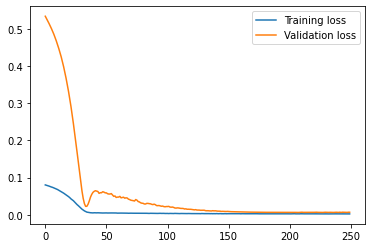

In [84]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()


#Testing the model with test data

In [75]:
data_test= data_test.drop(['Date', 'Adj Close'], axis=1 )

In [76]:
scaled_test_data=scalar.transform(data_test)

In [77]:
scaled_test_data

array([[0.96226714, 0.95182356, 0.93531842, 0.94390306, 0.02294793],
       [0.94393586, 0.94459849, 0.94104569, 0.95103401, 0.01378077],
       [0.93133383, 0.94478216, 0.9303321 , 0.94786783, 0.03143174],
       [0.95241988, 0.96727009, 0.95177056, 0.97708883, 0.02734735],
       [0.97941534, 0.97920425, 0.97232723, 0.98831382, 0.02474962],
       [0.97833933, 0.97056253, 0.96499421, 0.96554325, 0.01456106],
       [0.96022784, 0.9615034 , 0.94515592, 0.95420018, 0.01634578],
       [0.95158607, 0.9542644 , 0.95231143, 0.95861481, 0.01316042],
       [0.9600588 , 0.95981679, 0.94971404, 0.95061785, 0.01419515],
       [0.95136636, 0.94923521, 0.94303743, 0.94837391, 0.01616646],
       [0.95928702, 0.97888978, 0.95425523, 0.979119  , 0.02092088],
       [1.00390958, 1.03145527, 1.00162268, 1.03312955, 0.03007714],
       [1.0413946 , 1.04879436, 1.03631856, 1.03557587, 0.02491077],
       [1.04008767, 1.03548527, 1.03330423, 1.04108718, 0.01531711],
       [1.05416566, 1.04585533, 1.

In [85]:
x_test, y_test = perprocessData(scaled_training_data, n_back_steps)
x_test.shape , y_test.shape

((4062, 60, 5), (4062,))

In [86]:
x_test

array([[[2.27303632e-04, 6.43283156e-04, 0.00000000e+00, 9.24472018e-05,
         5.43577158e-01],
        [5.10729413e-04, 2.03521039e-03, 1.27420629e-03, 2.32514214e-03,
         2.77885876e-01],
        [3.24397659e-03, 3.25522693e-03, 3.67386538e-03, 2.63049229e-03,
         2.22151352e-01],
        ...,
        [2.10213065e-02, 2.03687378e-02, 1.94526910e-02, 1.92426584e-02,
         2.69022455e-01],
        [2.00587736e-02, 1.96256344e-02, 1.97501896e-02, 1.90073414e-02,
         2.58801782e-01],
        [1.96266196e-02, 2.27394507e-02, 2.00982095e-02, 2.32542299e-02,
         3.64401617e-01]],

       [[5.10729413e-04, 2.03521039e-03, 1.27420629e-03, 2.32514214e-03,
         2.77885876e-01],
        [3.24397659e-03, 3.25522693e-03, 3.67386538e-03, 2.63049229e-03,
         2.22151352e-01],
        [3.38147960e-03, 2.73394743e-03, 2.13583780e-03, 1.36147087e-03,
         1.85522815e-01],
        ...,
        [2.00587736e-02, 1.96256344e-02, 1.97501896e-02, 1.90073414e-02,
        

In [87]:
y_pred= model.predict(x_test)
print(y_pred)

[[0.04987118]
 [0.04979533]
 [0.04972309]
 ...
 [1.0496427 ]
 [1.0525281 ]
 [1.0550115 ]]


rescale the data back to its original form

In [88]:
y_pred=y_pred*(1/scalar.scale_[0])
y_test=y_test* (1/scalar.scale_[0])
y_pred

array([[  88.52684 ],
       [  88.392204],
       [  88.263954],
       ...,
       [1863.2314  ],
       [1868.3535  ],
       [1872.7617  ]], dtype=float32)

In [89]:
y_test

array([  42.859349,   40.478276,   39.008786, ..., 1738.380238,
       1712.600209, 1686.010243])

#Plotting predictions on training data

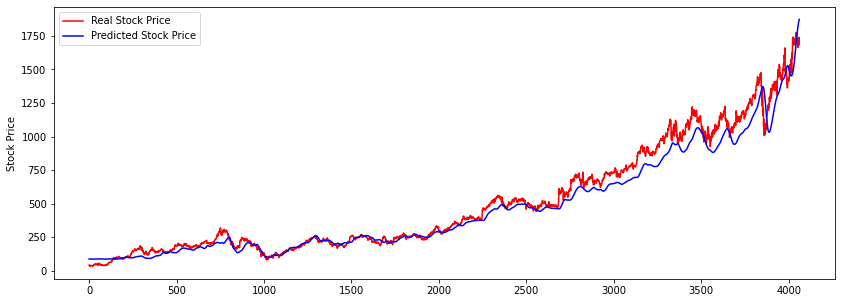

In [90]:
plt.figure(figsize=(14,5))
plt.plot(y_test, color="red" , label="Real Stock Price")
plt.plot(y_pred ,color="blue", label="Predicted Stock Price")


plt.ylabel("Stock Price")
plt.legend()
plt.show()

In [93]:
x_test, y_test = perprocessData(scaled_test_data, n_back_steps)
x_test.shape , y_test.shape
y_pred= model.predict(x_test)
y_pred=y_pred*(1/scalar.scale_[0])
y_test=y_test* (1/scalar.scale_[0])

#Plotting prediction on test data

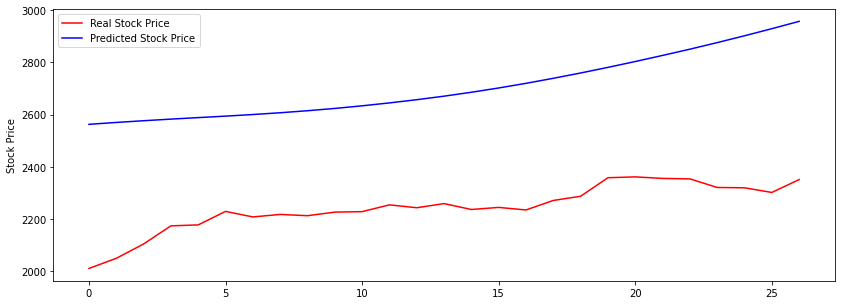

In [94]:
plt.figure(figsize=(14,5))
plt.plot(y_test, color="red" , label="Real Stock Price")
plt.plot(y_pred ,color="blue", label="Predicted Stock Price")


plt.ylabel("Stock Price")
plt.legend()
plt.show()